In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [3]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p.shape[0],q.shape[0])
print(p[1,0])

print(p, "\n\n", q)

4 5
0.6336482349262754
[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [4]:
def naive(p, q):
    ''' fill your code in here...
    '''
    dist_result = np.zeros((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            x_tmp = pow((p[i,0]-q[j,0]), 2)
            y_tmp = pow((p[i,1]-q[j,1]), 2)
            dist_result[i,j] = np.sqrt(x_tmp + y_tmp)   
    return dist_result


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [17]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

diff = (p[rows.ravel()]-q[cols.ravel()])*(p[rows.ravel()]-q[cols.ravel()])
squared = diff[:,0] + diff[:,1]
dist_result = np.reshape(np.sqrt(squared), (p.shape[0],q.shape[0]))
print(dist_result)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.0

In [13]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    diff = (p[rows.ravel()]-q[cols.ravel()])*(p[rows.ravel()]-q[cols.ravel()])
    squared = diff[:,0] + diff[:,1]
    dist_result = np.reshape(np.sqrt(squared), (p.shape[0],q.shape[0])
    return dist_result

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [18]:
conda install scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [22]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [23]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

74.7 ms ± 9.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.2 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.19 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.01 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


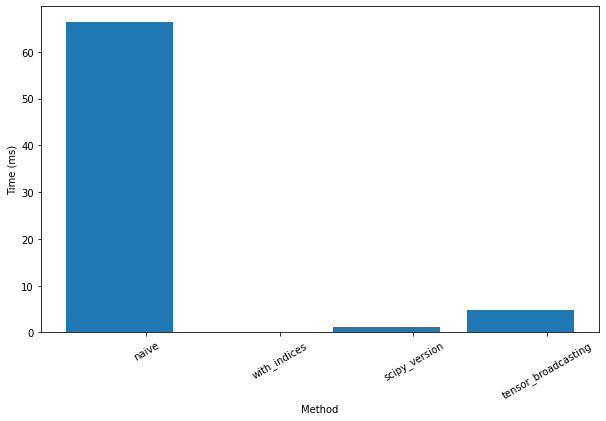

In [24]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()